README
This is the test code for our best model the CNN.
Everything here is self contained should be run in google colab

In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
!pip install gdown

In [3]:
import gdown

In [4]:
folder_url = "https://drive.google.com/drive/folders/1Who2Wy1-7dEC9TuLurCXakKYKLCtm4k1"
gdown.download_folder(folder_url, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1_ETyaHkdaWA1tm3xl3kiHN_BItIz4lKY CNN_model.keras
Processing file 1XD6e1PYznQjzadBY5xmq_fhyXu65twJH Test_data.npy
Processing file 1BwJIvoKFjdZz5y-ICX7yRxNYYOYA_jWx Test_labels.npy


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1_ETyaHkdaWA1tm3xl3kiHN_BItIz4lKY
To: /content/758Project_Group14/CNN_model.keras
100%|██████████| 5.57M/5.57M [00:00<00:00, 226MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1XD6e1PYznQjzadBY5xmq_fhyXu65twJH
From (redirected): https://drive.google.com/uc?id=1XD6e1PYznQjzadBY5xmq_fhyXu65twJH&confirm=t&uuid=9df4f9df-a3fb-4583-93a1-a74cc629e777
To: /content/758Project_Group14/Test_data.npy
100%|██████████| 173M/173M [00:01<00:00, 144MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BwJIvoKFjdZz5y-ICX7yRxNYYOYA_jWx
To: /content/758Project_Group14/Test_labels.npy
100%|██████████| 10.6k/10.6k [00:00<00:00, 28.8MB/s]
Download completed


['/content/758Project_Group14/CNN_model.keras',
 '/content/758Project_Group14/Test_data.npy',
 '/content/758Project_Group14/Test_labels.npy']

In [5]:
#Load the model and the testing arrays
model = tf.keras.models.load_model("/content/758Project_Group14/CNN_model.keras")
X_test = np.load("/content/758Project_Group14/Test_data.npy")
y_test = np.load("/content/758Project_Group14/Test_labels.npy")


In [6]:
#Testing Accuracy and metrics

loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)

y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8822 - loss: 0.3702
Test accuracy: 0.8885496258735657
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       150
           1       0.76      1.00      0.86        65
           2       0.77      0.81      0.79       150
           3       0.94      0.85      0.90       150
           4       0.86      0.95      0.90       150
           5       0.97      0.88      0.92       150
           6       1.00      1.00      1.00        56
           7       0.95      0.93      0.94       150
           8       0.95      0.86      0.91       139
           9       0.86      0.82      0.84       150

    accuracy                           0.89      1310
   macro avg       0.89      0.90      0.89      1310
weighted avg       0.89      0.89      0.89      1310



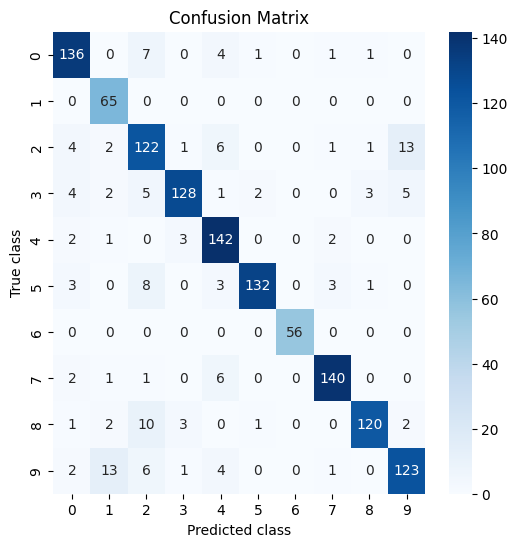

In [7]:
#Confusion Martix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()